#TEMA 1

##PROBLEMAS DE DISTRIBUCIONES DISCRETAS

##Variable aleatoria general y esperanza matemática

## EJERCICIO 1

1. Una empresa tiene que presentar una __oferta para una obra pública__. Estima que los materiales necesarios __costarán 25000€__, cada día de trabajo supone un __coste laboral de 800€__ y el __plazo de ejecución tiene que ser 10 días__ porque cada __día de retraso__ supondrá una __penalización de 1000€.__ Analizando obras similares ha calculado que la variable aleatoria que mide el número de días de ejecución tiene la __siguiente distribución__:

    1. ¿Cuál es la __probabilidad__ de que __el número de días de ejecución__ esté __entre 9 y 11 días__?
    2. Si una obra ya lleva __9 días de ejecución__ ¿cuál es la __probabilidad__ de que dure __al menos 1 día más__?
    3. ¿Cuál es el __coste medio__ de la obra?
    4. ¿Cuál es la __desviación típica del coste__ de la obra?

|dias | probabilidad |
|-----|--------------|
|0.1|8|
|0.2|9|
|0.4|10|
|0.2|11|
|0.1|12|


__DATOS:__
- materiales = 25000
- coste laboral = 800
- plazo de ejecución = 10
- penalización por día adicional = 1000


### ––––––––––––––––––– A.

Nos preguntan por la probabilidad de que el número de días esté entre 9 y 11:

$P(9 ≤ k ≤ 11) = \sum{p_i}$


In [14]:
#!/usr/bin/env
# -*- coding:utf-8 -*-

from __future__ import division

from IPython.display import Latex
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sc
import prettyplotlib as ppl
import seaborn as sns
from pylab import *

sns.set(style="ticks", palette="Set2")
sns.despine()

%matplotlib inline

In [15]:
# datos:

dias = [8, 9, 10, 11, 12]
prob = [0.1, 0.2, 0.4, 0.2, 0.1]

# calulamos la probabilidad según lo hemos planteado:


p_a = sum(prob[1:-1])
print '\nPor tanto:'

Latex(u'$\sum^{11}_9{p_i} = %s$' % p_a)



Por tanto:


<IPython.core.display.Latex object>

### ––––––––––––––––––– B.

Nos preguntan por la probabilidad de que una obra que lleva 9 días dure un día más como poco, aplicando __Teorema de Bayes__:

$P(X\ ≥\ 10\ |\ X\ ≥\ 9)\ =\ \frac{P(X\ ≥\ 9\ |\ X\ ≥\ 10)\ ·\ P(X\ ≥\ 10)}{P(X\ ≥\ 9)}$

Si nos damos cuenta:

$P(X\ ≥\ 9\ |\ X\ ≥\ 10) = 1$

Lo que nos dice es, la probabilidad de que X ≥ 9 sabiendo que X ≥ 10. Si X ≥ 10, __siempre__ se cumple que X ≥ 9.

Por tanto nos queda:

$P(X\ ≥\ 10\ |\ X\ ≥\ 9)\ =\ \frac{1\ ·\ P(X\ ≥\ 10)}{P(X\ ≥\ 9)}$

Tenemos que calcular por tanto: 

$ P(X\ ≥\ 10) = \sum^{∞}_{10}{p_i} $

$ P(X\ ≥\ 9) = \sum^{∞}_{9}{p_i} $

In [16]:
# p(x ≥ 10)

p_b = sum(prob[dias.index(10):])

print '\nPor tanto:'

Latex(u'$P(X\ ≥\ 10)\ =\ \sum^{∞}_{10}{p_i} = %s$' % p_b)



Por tanto:


<IPython.core.display.Latex object>

In [17]:
# p(x ≥ 9)

p_bb = sum(prob[dias.index(9):])
print '\nPor tanto:'

Latex(u'$P(X\ ≥\ 9)\ =\ \sum^{∞}_9{p_i}\ =\ %s$' % p_bb)



Por tanto:


<IPython.core.display.Latex object>

In [18]:
# p(x ≥ 10 ) / p(x ≥ 9)

print '\nPor tanto:'

Latex(r'$P(X\ ≥\ 10\ |\ X\ ≥\ 9)\ =\ \frac{1\ ·\ P(X\ ≥\ 10)}{P(X\ ≥\ 9)}\ =\ %s$'.decode('utf-8') % (p_b / p_bb))


Por tanto:


<IPython.core.display.Latex object>

### ––––––––––––––––––– C.
Para __hallar el coste medio de la obra__, necesitamos modelar primero el problema:

DATOS:
- materiales = 25000
- coste laboral = 800
- plazo de ejecución = 10
- penalización por día adicional = 1000

coste-obra __=__ materiales __+__ coste-laboral __·__ dias

coste-obra-penalizacion __=__ materiales __+__ coste-laboral __·__ dia __+__ (dias __-__ 10) __·__ penalización

__Sea:__
- __y =__ Coste de la obra
- __y' =__ coste de la obra con penalización (si x > 10)
- __m =__ materiales
- __cl =__ coste laboral
- __x =__ dias
- __p =__ penalizacion

$y = 25000 + 800 · x$

$y' = 25000 + 800 · x + (x - 10)·1000$

In [19]:
y = [] # Creamos la variable COSTE DE LA OBRA

for x in dias:
    if x <= 10:
        y += [25000 + 800*x]
    else:
        y += [25000 + 800*x + (x - 10) * 1000]

print u'Días'.upper(), '\t', 'Coste'.upper(), '\t', 'Prob'.upper()
print '––––––––––––––––––––'
for i, ii, iii in zip(dias, y, prob):
    print i, '\t', ii, '\t', iii

DÍAS 	COSTE 	PROB
––––––––––––––––––––
8 	31400 	0.1
9 	32200 	0.2
10 	33000 	0.4
11 	34800 	0.2
12 	36600 	0.1


El coste medio de la obra por tanto será:

$E(Y) = E(25000 + 800·x) = 25000 + 800 · E(X)$

ó

$E(Y) = \sum^{∞}_{0}{Y_i·P_i} = CMO$


In [20]:
cmo = 0 # Creamos la variable COSTE MEDIO DE LA OBRA

for c, p in zip(y, prob): 
    cmo += c * p

Latex(r'$E(Y) = \sum^{∞}_{0}{Y_i·P_i} = CMO = %s$'.decode('utf-8') % cmo)


<IPython.core.display.Latex object>

### ––––––––––––––––––– D.

Para hallar la desviación típica del coste de la obra, acudimos a la fórmula:

$\sqrt{V(Y)} = \sqrt{E((Y - E(Y))^2)} = \sqrt{\sum{P_i · (y_i - \bar{y})^2}}$

In [21]:
# RECORDEMOS LAS VARIABLES: 

print u'Días'.upper(), '\t', 'Coste'.upper(), '\t', 'Prob'.upper()
print u'X'.upper(), '\t', 'Y'.upper(), '\t', 'Prob'.upper()
print '––––––––––––––––––––'
for i, ii, iii in zip(dias, y, prob):
    print i, '\t', ii, '\t', iii

DÍAS 	COSTE 	PROB
X 	Y 	PROB
––––––––––––––––––––
8 	31400 	0.1
9 	32200 	0.2
10 	33000 	0.4
11 	34800 	0.2
12 	36600 	0.1


In [22]:
# V(Y) = E( (Y − E(Y) )^2) = ∑ pi · (yi − cmo)^2
var = 0

for coste, pr in zip(y, prob):
    var += pr * (coste - cmo) ** 2

Latex(r'$V(Y) = E((Y - E(Y))^2) = \sum{(y_i · p_i - \bar{y})^2} = %s$'.decode('utf-8') % var)

Latex(r'$D(Y) = \sqrt{V(Y)} = %s$'.decode('utf-8') % var ** 0.5)

<IPython.core.display.Latex object>

## EJERCICIO 2:

2. Un individuo dispone de __6000€__ para invertir en un negocio. Su analista le propone una inversión cuya __rentabilidad es del 15%__ pero con el __riesgo de perder el 50% del capital__. Según su conocimiento, la inversión será __rentable con una probabilidad de 0,70__. Si decide invertir, __¿cuál es el beneficio esperado?__



__DATOS:__
- __renta (Y) =__ 6000
- __rentabilidad (r) =__ 0.15
- __riesgo =__ Perder 50% de y
- __P(rentable) =__ 0.7

__AVERIGUAR:__
- BENEFICIO ESPERADO (b)

__PLANTEAMIENTO MATEMÁTICO:__

$Beneficio\ esperado\ =\ E(b) = \sum{b_i·P_i}$

$b = ING - PER = Y · r - Y · riesgo$

$E(b) = Y · r · P(rentable) - Y · riesgo · P(no\ rentable)$

$E(b) = 6000 · 0.15 · 0.7 - 6000 · 0.5 · (1 - 0.7)$

In [23]:
b = 6000 * 0.15 * 0.7 - 6000 * 0.5 * (1 - 0.7)

Latex(r'$E(b) = 6000 \times 0.15 \times 0.7 - 6000 \times 0.5 \times (1 - 0.7) = %s$'.decode('utf-8') % b)

<IPython.core.display.Latex object>

In [24]:
del y, prob, x, dias, cmo, b

## EJERCICIO 3:

3. Se lanzan dos dados de 6 caras numeradas de 1 a 6. Sea __X = la suma de las puntuaciones.__ __Calcula:__
    1. La función de probabilidad de la variable
    2. La media y varianza de la variable

__DATOS:__

- Dado 1 (Y): 1-6
- Dado 2 (Z): 1-6

### ––––––––––––––––––– A.

__FUNCIÓN DE PROBABILIDAD:__

- P(X) = P(Y + Z) = P(Y) · P(Z) (INDEPENDIENTES)

In [34]:
# X = Y + Z

x = []
pares = []

for y in range(1, 7):
    for z in range(1, 7):
        x += [y + z]
        pares += [[y, z]]

print '(y,z)', '\t', 'x'
print '–––––––––––'
del y, z

for y, z in pares:
    print '(%s,%s)' % (y, z), '\t', y + z


(y,z) 	x
–––––––––––
(1,1) 	2
(1,2) 	3
(1,3) 	4
(1,4) 	5
(1,5) 	6
(1,6) 	7
(2,1) 	3
(2,2) 	4
(2,3) 	5
(2,4) 	6
(2,5) 	7
(2,6) 	8
(3,1) 	4
(3,2) 	5
(3,3) 	6
(3,4) 	7
(3,5) 	8
(3,6) 	9
(4,1) 	5
(4,2) 	6
(4,3) 	7
(4,4) 	8
(4,5) 	9
(4,6) 	10
(5,1) 	6
(5,2) 	7
(5,3) 	8
(5,4) 	9
(5,5) 	10
(5,6) 	11
(6,1) 	7
(6,2) 	8
(6,3) 	9
(6,4) 	10
(6,5) 	11
(6,6) 	12


In [26]:
frec = []
for xi in np.unique(x):
    frec += [list(x).count(xi)]

In [38]:
prob = []
ind = 0
print 'Función de Probabilidad X: '
print 'i', '\t', 'x', '\t', 'f', '\t', 'prob'
print '––––––––––––––––––––––––––––––––'
for xi, fi in zip(np.unique(x), frec):
    print ind, '\t', xi, '\t', fi, '\t', fi / sum(frec)
    prob += [fi / sum(frec)]
    ind += 1

Función de Probabilidad X: 
i 	x 	f 	prob
––––––––––––––––––––––––––––––––
0 	2 	1 	0.0277777777778
1 	3 	2 	0.0555555555556
2 	4 	3 	0.0833333333333
3 	5 	4 	0.111111111111
4 	6 	5 	0.138888888889
5 	7 	6 	0.166666666667
6 	8 	5 	0.138888888889
7 	9 	4 	0.111111111111
8 	10 	3 	0.0833333333333
9 	11 	2 	0.0555555555556
10 	12 	1 	0.0277777777778


GRAFICAMENTE: 


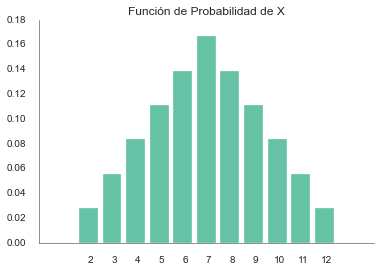

In [29]:
print 'GRAFICAMENTE: '
ppl.bar(np.unique(x) - 0.5, prob)
plt.xticks(np.unique(x))
plt.title(u'Función de Probabilidad de X')

### ––––––––––––––––––– B.

Media y Varianza:

$Media = E(X) = \sum^{10}_0{(X_i · P_i)}$

$Varianza = E((X - E(X))^2) = \sum^{10}_0{P_i·(X_i - \bar{X})^2}$

In [56]:
media = sum(np.multiply(np.unique(x),prob)) # CUIDADO! No dividir por N, multiplicamos por P_i

Latex(r'$Media = E(X) = \sum^{10}_0{(X_i · P_i)} = %s$'.decode('utf-8') % media)

<IPython.core.display.Latex object>

In [57]:
var = sum(np.multiply(prob,((np.unique(x) - media) ** 2)))

Latex(r'$Varianza = E((X - E(X))^2) = \sum^{10}_0{P_i·(X_i - \bar{X})^2} = %s$'.decode('utf-8') % var)


<IPython.core.display.Latex object>


## EJERCICIO 4.

4. Una Comunidad Autónoma decide gravar con una tasa a todos los turistas que acceden con vehículo propio a un parque natural. Se ha estudiado que __la variable aleatoria X, número de personas por coche que entran en el parque__, tiene la siguiente probabilidad: X = [1, 2, 3, 4, 5] , P(X=x) = [0.05, 0.20, 0.35, 0.25, 0.15].
    1. Hállese el número medio de visitantes por vehículo
    2. ¿Cuánto debe pagar cada persona para que la ganancia esperada por coche sea de 13 euros?
    3. Si cada visitante paga 5 euros, ¿cuál es la ganancia esperada de un día en el que se registre una entrada de 1000 vehículos?
    
|X     |1|2|3|4|5|
|-|-|-|-|-|-|
|P(X=x)|0.05|0.20|0.35|0.25|0.15|

In [58]:
X = [1, 2, 3, 4, 5] 
Prob = [0.05, 0.20, 0.35, 0.25, 0.15]

### ––––––––––––––––––– A.


In [60]:
media = sum(np.multiply(X,Prob))

media

3.25

### ––––––––––––––––––– B.

Tasa:

$Recaudacion = x_i · tasa$

$E(Recaudacion) = E(x_i) · tasa$

$tasa = E(Recaudacion) / E(x_i)$

In [61]:
tasa = 13 / media

tasa

4.0


### ––––––––––––––––––– C.

- Cada visitante paga 5 €
- Entrada de 1000 vehículos.

$E(Recaudacion) = E(X_i) · vehiculos · tasa$

$E(R) = E(x_i) · 1000 · 5$


In [63]:
recaudacion = 1000 * 5 * media

recaudacion

16250.0

## EJERCICIO 5.

5. Un __parking público__ obtuvo los siguientes datos de una muestra de 250 clientes acerca de __la cantidad de horas__ que se estacionan los automóviles y __las cantidades que pagan__ [TABLA].
    1. Se quiere predecir la cantidad de horas que va a estacionar su automóvil un nuevo cliente ¿cuál es la __probabilidad de esté entre 2 y 5 horas?__
    1. Si un coche lleva estacionado dos o más horas ¿cuál es la __probabilidad de que el pago sea superior a 14 €?__
    1. Calcular el __pago esperado__ así como su __desviación típica__.
    1. ¿Qué __pago se espera__ si el coche lleva estacionado __dos o más horas?__

|Horas|1|2|3|4|5|6|7|8|Total|
|--|
|Frecuencia|20|38|53|45|40|13|5|36|250
|Pago (en €)|3|6|9|12|14|16|18|20||


